# Introduction to Computer Vision with OpenCV

This notebook serves as a foundational introduction to computer vision techniques, leveraging the OpenCV library. OpenCV is a widely adopted, cross-platform library that provides essential building blocks and fundamental algorithms for computer vision tasks.

The notebook offers a guided exploration of basic image processing functionalities within OpenCV code. This exploration aims to equip you with a solid understanding of the code structure and practical usage of OpenCV for computer vision applications.

housekeeping for colab

In [1]:
%%capture
# for google Colab, to setup the environment
# !pip install opencv-python
# !sudo apt-get install qtbase5-dev

prepare folder

In [ ]:
!mkdir imgs

# References
- python opencv documentations : https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html

# Libraries

In [2]:
import cv2
import numpy as np

from matplotlib import pyplot as plt

print(cv2.__version__)
%matplotlib inline

4.9.0


# Introduction - What does Computer see in Image?
- just a array of pixel values on a spatial coordiantes (i,j).

![what_computer_see.png](https://i.ibb.co/JsgjFzw/workshop3-1-lincoln-image-explain.png)


# Image Read
- Reading an image from path and returns it
- Support the common file formats (.bmp, .jpg, .jpeg, .png, .tif)

In [3]:
from PIL import Image
from urllib.request import urlretrieve
from os import remove

def load_image(path_or_url):
    """Loads an image from a given URL or path. If the input is a URL,
    it downloads the image and saves it as a temporary file. If the input is a path,
    it loads the image from the path. The image is then converted to RGB format and returned.
    """
    if path_or_url.startswith("http"):  # assume URL if starts with http
        urlretrieve(path_or_url, "imgs/tmp.jpg")
        img = cv2.imread("imgs/tmp.jpg")
        remove("imgs/tmp.jpg")  # cleanup temporary file
    else:
        img = cv2.imread(path_or_url)
    return img

In [4]:
# Loading the image at path
img = load_image("https://i.ibb.co/Z6L3q4j/dog1.jpg")  # loca path - "imgs/dog1.jpg"
img.shape

(6306, 4204, 3)

Hence, this image is of height of 6306 pixels (i), width of 4204 pixels (j) and of 3 color channels.


![image.png](https://i.ibb.co/4fxCNz4/workshop3-1-dog-image-channel-split.png)

We could also selectively are to display the raw pixel values of the image (from top left) 
- first 50 pixels (both height and width)
- on the first channel

In [5]:
img[:50, :50, 0]

array([[183, 183, 183, ..., 185, 185, 185],
       [183, 183, 183, ..., 184, 185, 185],
       [183, 183, 183, ..., 184, 185, 185],
       ...,
       [165, 165, 165, ..., 163, 163, 163],
       [163, 163, 162, ..., 163, 163, 163],
       [162, 162, 162, ..., 163, 163, 163]], dtype=uint8)

# Imshow

**Channel Order Discrepancy between plt.imshow and cv2.imshow**

It's important to note a potential discrepancy in channel order when displaying images using `plt.imshow` from Matplotlib and `cv2.imshow` from OpenCV.

- **Matplotlib (plt.imshow)**: This function assumes the image data follows the RGB color channel order, where Red, Green, and Blue channels are stored in that specific order.
- **OpenCV (cv2.imshow)**: In contrast, OpenCV expects the image data to be in BGR format, where Blue, Green, and Red channels come first, second, and third, respectively.

In the context of this notebook, we will preferentially utilize `plt.imshow` for image display. 

- It is important to note that, cv2 read the image as BGR
- while matplotlib expects the image as RGB
- Hence, we need to convert the image from BGR to RGB for plt.show() 
    - via `[...,::-1]`


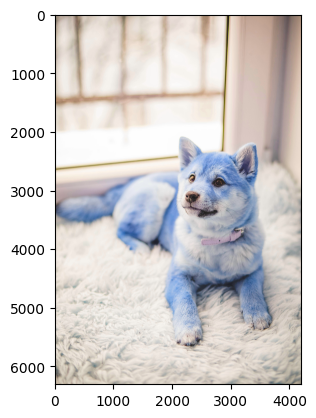

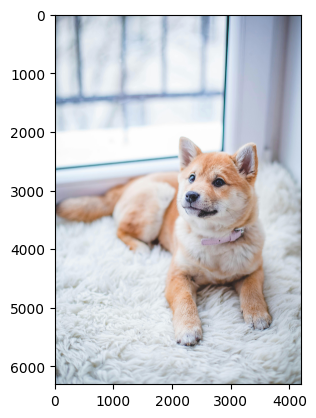

In [6]:
# # CV2
plt.imshow(img[..., ::])  # Image with BGR
plt.show()

# # Matplotlib
plt.imshow(img[..., ::-1])  # Manipulate the Image to be RGB before showing
plt.show()

# Image Show
Plotting an image (via plt.imshow)

Height = 6306, Width = 4204


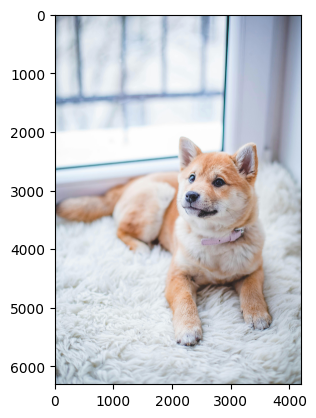

In [7]:
# Extracting the height and width of an image
h, w = img.shape[:2]
# Displaying the height and width
print("Height = {}, Width = {}".format(h, w))
# Show the image with matplotlib
plt.imshow(img[..., ::-1])
plt.show()

# Image Resizing

Image resizing is a technique used to **downscale/upscale the overall dimensions** of an image. This typically involves the use of interpolation techniques. Resizing an image can impact its quality, which can be a concern for computer vision tasks. 

**Notes:**
- Both downscaling and upscaling will lead to quality loss.
- Blurry or pixelated images can make it harder for the software to identify objects, faces, or other features.
- The extent of the impact depends on the severity of the resizing and the specific computer vision task.

Height = 800, Width = 600


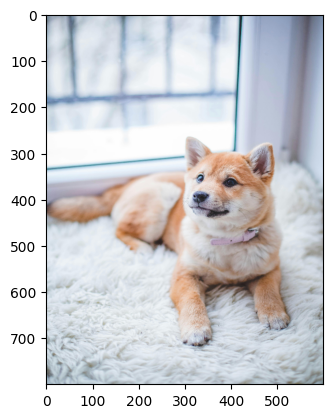

In [8]:
down_width = 600
down_height = 800
down_points = (down_width, down_height)
resized_down = cv2.resize(img, down_points, interpolation=cv2.INTER_LINEAR)
# we could easily rezing to a higher resolution by changing the params here.

print("Height = {}, Width = {}".format(down_height, down_width))

# Show the image with matplotlib
plt.imshow(resized_down[..., ::-1])
plt.show()

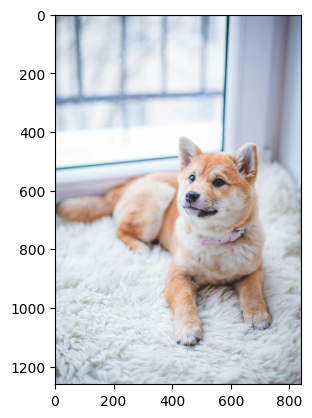

In [9]:
scale_ratio = 0.2
new_width = int(img.shape[1] * scale_ratio)
new_height = int(img.shape[0] * scale_ratio)
new_size = (new_width, new_height)
aspect_resized = cv2.resize(img, new_size, interpolation=cv2.INTER_LINEAR)  # INTER_AREA

# Show the image with matplotlib
plt.imshow(aspect_resized[..., ::-1])
plt.show()

# Contrast and Brightness

- Brightness is the overall amount of light in an image.
- Contrast is the difference between the lightest and darkest parts of an image.
- High contrast makes details clearer, like a high-contrast photograph.
- Low contrast makes details less clear, like a faded photograph.

The example below increases the brightness and contrast.

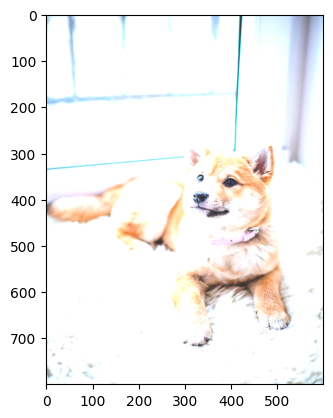

In [10]:
# Adjust contrast and brightness
alpha = 1.15  # Example contrast value
beta = 1.5  # Example brightness value
adjusted_image = cv2.convertScaleAbs(resized_down, alpha, beta)

plt.imshow(adjusted_image[..., ::-1])
plt.show()

# Gaussian Blur
Gaussian blur, also known as Gaussian smoothing, is a widely used image processing technique employed to reduce image noise and blur image details. It achieves this effect by applying a Gaussian function, also referred to as the normal distribution, to each pixel within the image. It is similar to a box filter, but instead of weighting each neighboring pixel equally as the box filter does, it applies a weight based on the normal distribution.

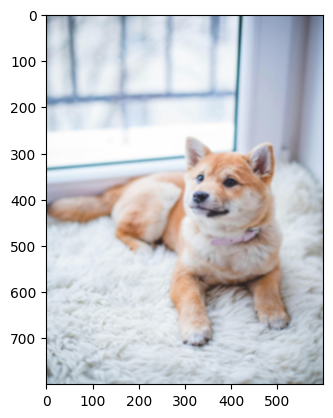

In [11]:
blur_image = cv2.blur(resized_down, (5, 5))

# Display the modified image`
# Show the image with matplotlib
plt.imshow(blur_image[..., ::-1])
plt.show()

# Grayscale Conversion
If the image is in color, it could be converted to grayscale (black and white) via the `cvtColor` function. This will convert each pixel to have a single brightness value ranging from 0 (black) to 255 (white) instead of 3 seperate channels (RGB).

Some images are monochrome (single channel) by nature, and there are some image techniques that can only performed on grayscale images. Some computer vision applications of grayscale images include:
- Medical Imaging: Separating bones from soft tissue in X-rays.
- Document Analysis: Isolating text from the background in scanned documents.

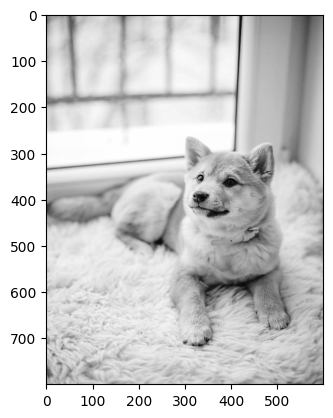

In [12]:
# TO grayscale
img_gray = cv2.cvtColor(resized_down, cv2.COLOR_BGR2GRAY)

plt.imshow(img_gray[..., ::], cmap="gray")
plt.show()

# Sobel filter (Edge detection)
The Sobel filter is a well-established technique in computer vision employed for edge detection within digital images. It operates by identifying areas exhibiting significant changes in pixel intensity, often corresponding to the boundaries between objects in the image.

## Conceptual Understanding:

Imagine a digital image as a collection of tiny squares called pixels. Each pixel represents a specific color intensity value. The Sobel filter focuses on detecting abrupt transitions between these intensity values across neighboring pixels. These transitions frequently occur at the edges of objects, where a shift from a dark region to a bright region (or vice versa) takes place.

![sobel_filter](https://i.ibb.co/VjLpRrB/workshop3-1-sobel-1.png)

- where *gX* is the horizontal edge detector
- where *gY* is the Vertical edge detector

![image.png](https://i.ibb.co/2KYNXpJ/workshop3-1-sobel-2.png)
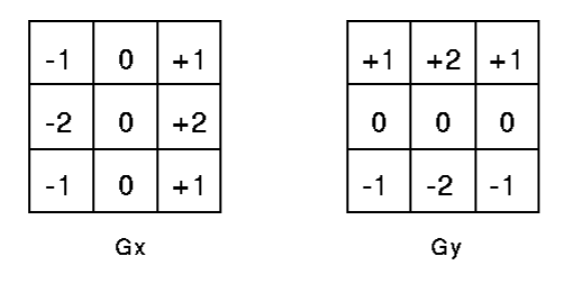

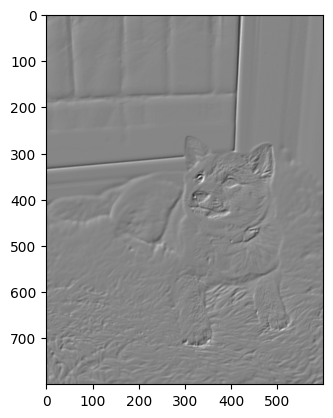

In [13]:
gX = cv2.Sobel(img_gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=7)
gY = cv2.Sobel(img_gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=7)
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

plt.imshow(combined[..., ::], cmap="gray")
plt.show()

# Histogram Equalization

- Histogram equalization takes the information and tries to make the picture look more balanced. It does this by spreading out the pixels more evenly across the histogram. (So that the intensity range of the image is spread out across a wider range)


## Before
![image-2.png](https://i.ibb.co/K72QYB4/workshop3-1-hist-before.png)
## After
![image.png](https://i.ibb.co/z4ZD0Yq/workshop3-1-hist-after.png)

- Image adapted from https://towardsdatascience.com/histogram-equalization-5d1013626e64
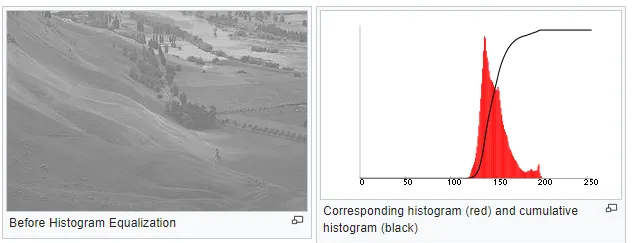
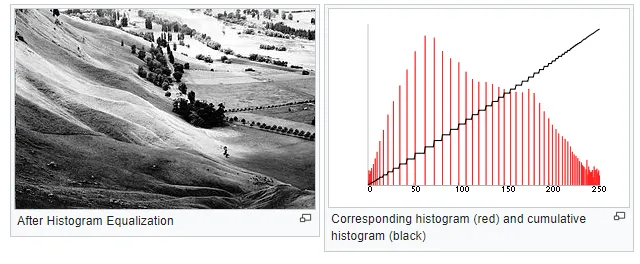

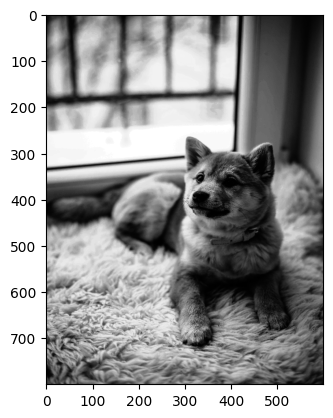

In [14]:
img_gray_hist = cv2.equalizeHist(img_gray)

plt.imshow(img_gray_hist[..., ::], cmap="gray")
plt.show()

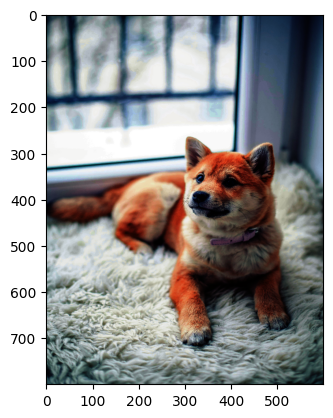

In [15]:
B, G, R = cv2.split(resized_down)
B = cv2.equalizeHist(B)
G = cv2.equalizeHist(G)
R = cv2.equalizeHist(R)
equalized_image = cv2.merge((B, G, R))

# Show the image with matplotlib
plt.imshow(equalized_image[..., ::-1])
plt.show()

# Binary Thresholding
Binary thresholding is a technique used to distinguish between the foreground (objects in the picture) and the background. It's like creating a digital cut-off point for brightness. This essentially creates a high-contrast image where objects are easily distinguished from the background. 

There are multiple methods to turn an image into values of [0, 1]. The most straight forward way would be via:
- **Threshold Selection**: You choose a specific brightness value (threshold) between 0 and 255.

(0.0, 256.0)

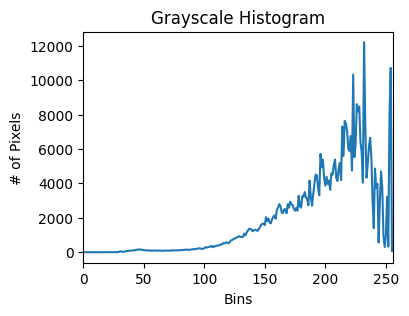

In [16]:
# import seaborn as sns
hist = cv2.calcHist([img_gray], [0], None, [256], [0, 256])

# plot the histogram
plt.figure(figsize=(4, 3))
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

We can than utilize cv2 threshold to select the threshold and bin everything into [0,255]

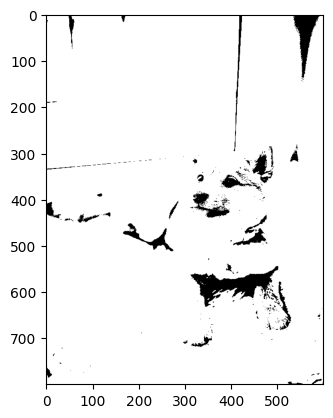

In [17]:
ret, thresh_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

plt.imshow(thresh_img[..., ::], cmap="gray")
plt.show()

# Other Image Operations

## Image Transformation
Please refer to the opencv documentation for references

- Rotation

![image.png](https://i.ibb.co/K7JRszx/workshop3-1-rotation.png)

- Translation

![image.png](https://i.ibb.co/YbH0jCM/workshop3-1-translation.png)

# Exercise (10 mins)

**1. Given the 2 images in the imgs folder (background.png and cv_logo.png) blend them as a single image.**
![image.png](https://i.ibb.co/68PQcxT/workshop3-1-open-cv-exercise-1.png)

weblink 
- background.png : https://i.ibb.co/NVwgY75/background.png
- background.png : https://i.ibb.co/yP4gRy7/cv-logo.png

**2. Extract the green channel image data from the dogs1.jpg and display it**
(this can be done via numpy indexing or cv functions)

![image.png](https://i.ibb.co/YTS2p1P/workshop3-1-open-cv-exercise-2.png)


# Conclusion
- Image operations can be broken down into simple mathematical operations, making them more accessible and understandable.
- Various packages, such as OpenCV, provide pre-built functions for different image operations, simplifying the process and allowing for efficient image manipulation.